## IMPORTING  THE  LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## DATA  IMPORTATION

In [2]:
data = pd.read_csv("predictive_maintenance.csv")

In [3]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


# DATA   EXPLORATION : : : Statistical and Visualization

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [5]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [6]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [7]:
data.isnull()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [9]:
data.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [10]:
data = data.rename(columns = {'UDI':'udi', 'Product ID':'p_id', 'Type':'type','Air temperature [K]':'air_temp',\
                         'Process temperature [K]':'p_temp','Rotational speed [rpm]':'rs',\
                          'Torque [Nm]':'tq','Tool wear [min]':'tw','Target':'target','Failure Type':'ft'})

In [11]:
data.columns

Index(['udi', 'p_id', 'type', 'air_temp', 'p_temp', 'rs', 'tq', 'tw', 'target',
       'ft'],
      dtype='object')

In [12]:
data.head()

,udi,p_id,type,air_temp,p_temp,rs,tq,tw,target,ft
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [13]:
s = data["target"]
data = data.drop("target", axis = 1)
data["target"] = s

data

,udi,p_id,type,air_temp,p_temp,rs,tq,tw,ft,target
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,No Failure,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,No Failure,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure,0
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,No Failure,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,No Failure,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,No Failure,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,No Failure,0


In [14]:
data["target"].value_counts()

target
0    9661
1     339
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

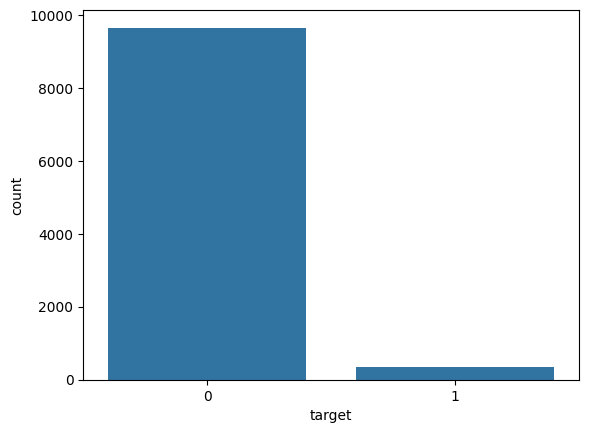

In [15]:
#  The Data is gotten from our dataframe called "data"

sns.countplot(x = "target", data = data)

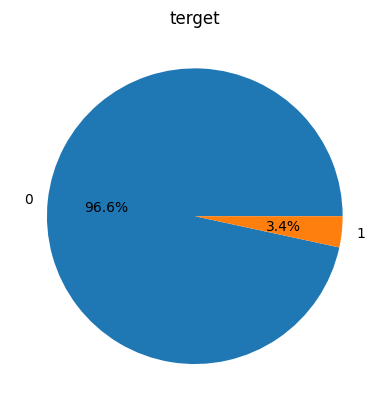

In [16]:
value_counts = data['target'].value_counts()

plt.pie(value_counts, labels = value_counts.index, autopct = "%1.1f%%")
plt.title("terget")
plt.show()

In [17]:
# The Statistical and Visualization Data Explration in line 14, 15 and 16 above, shows a 
# class imbalance/Oversampling which need to be addressed before training the model.

In [18]:
#  data["ft"].value_counts() OR

data.ft.value_counts()

ft
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

<Axes: xlabel='ft', ylabel='count'>

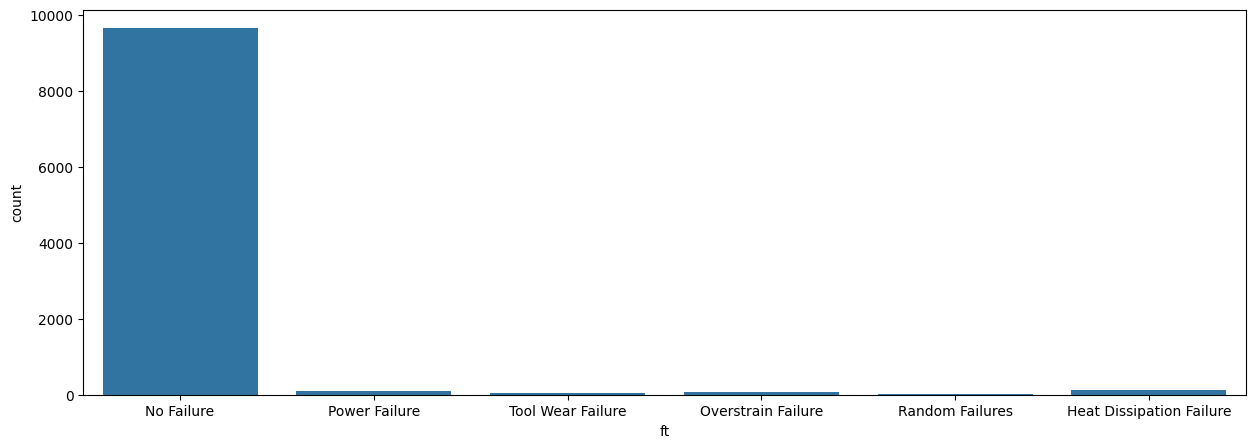

In [19]:
plt.figure(figsize = (15,5))
sns.countplot(x = "ft", data = data)

## DATA  PROCESSING: : : : :with explorations

In [20]:
data.head()

,udi,p_id,type,air_temp,p_temp,rs,tq,tw,ft,target
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,No Failure,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,No Failure,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure,0


In [21]:
# OR data.drop(["udi", "p_id", axis = 1])

data = data.drop(columns = ["udi", "p_id"])

In [22]:
data

,type,air_temp,p_temp,rs,tq,tw,ft,target
0,M,298.1,308.6,1551,42.8,0,No Failure,0
1,L,298.2,308.7,1408,46.3,3,No Failure,0
2,L,298.1,308.5,1498,49.4,5,No Failure,0
3,L,298.2,308.6,1433,39.5,7,No Failure,0
4,L,298.2,308.7,1408,40.0,9,No Failure,0
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,No Failure,0
9996,H,298.9,308.4,1632,31.8,17,No Failure,0
9997,M,299.0,308.6,1645,33.4,22,No Failure,0
9998,H,299.0,308.7,1408,48.5,25,No Failure,0


In [23]:
data["type"].unique()

array(['M', 'L', 'H'], dtype=object)

In [24]:
data["ft"].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

## Label encoding: technique for handling categorical data

In [25]:
lb = LabelEncoder()
data["type"] = lb.fit_transform(data["type"])
data["ft"] = lb.fit_transform(data["ft"])


In [26]:
data

,type,air_temp,p_temp,rs,tq,tw,ft,target
0,2,298.1,308.6,1551,42.8,0,1,0
1,1,298.2,308.7,1408,46.3,3,1,0
2,1,298.1,308.5,1498,49.4,5,1,0
3,1,298.2,308.6,1433,39.5,7,1,0
4,1,298.2,308.7,1408,40.0,9,1,0
...,...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,1,0
9996,0,298.9,308.4,1632,31.8,17,1,0
9997,2,299.0,308.6,1645,33.4,22,1,0
9998,0,299.0,308.7,1408,48.5,25,1,0


In [27]:
data["type"].unique()

array([2, 1, 0])

In [28]:
data["ft"].unique()

array([1, 3, 5, 2, 4, 0])

<Axes: >

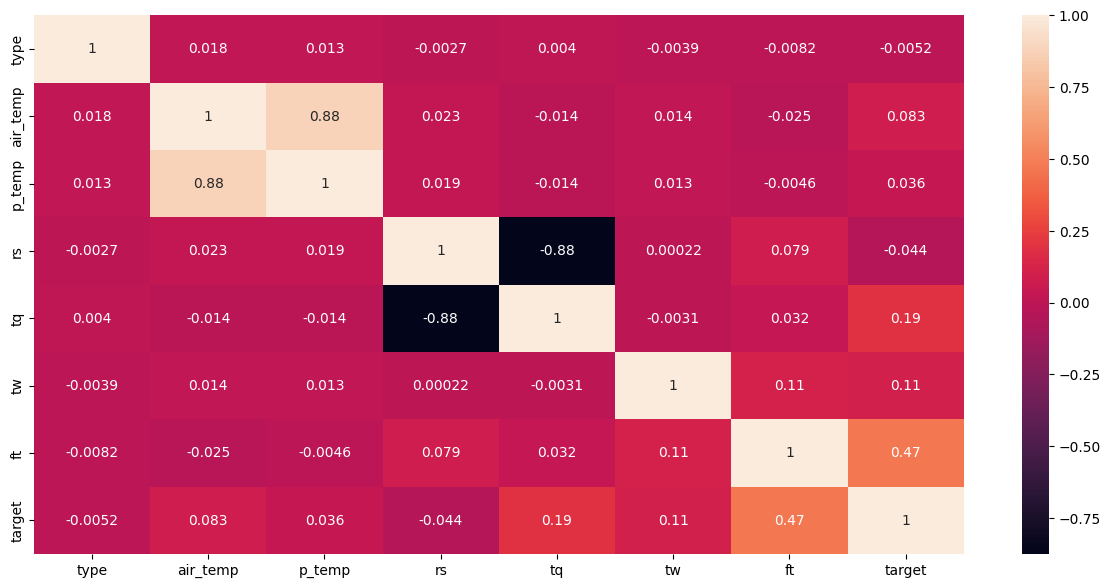

In [29]:
plt.figure(figsize = (15,7))
sns.heatmap(data.corr(), annot = True)

##  DATA  SPLITTING (Processing)  

In [30]:
data.head()

,type,air_temp,p_temp,rs,tq,tw,ft,target
0,2,298.1,308.6,1551,42.8,0,1,0
1,1,298.2,308.7,1408,46.3,3,1,0
2,1,298.1,308.5,1498,49.4,5,1,0
3,1,298.2,308.6,1433,39.5,7,1,0
4,1,298.2,308.7,1408,40.0,9,1,0


In [31]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [32]:
x.shape

(10000, 7)

In [33]:
y.shape

(10000,)

##  FEATURE  SELECTION

In [34]:
from sklearn.feature_selection import SelectKBest, f_classif

select = SelectKBest(score_func = f_classif, k = 4)
z = select.fit_transform(x, y)
flt=select.get_support()
s=x.columns
print(s[flt])

Index(['air_temp', 'tq', 'tw', 'ft'], dtype='object')


In [35]:
x = data[['air_temp', 'tq', 'tw', 'ft']]

x

,air_temp,tq,tw,ft
0,298.1,42.8,0,1
1,298.2,46.3,3,1
2,298.1,49.4,5,1
3,298.2,39.5,7,1
4,298.2,40.0,9,1
...,...,...,...,...
9995,298.8,29.5,14,1
9996,298.9,31.8,17,1
9997,299.0,33.4,22,1
9998,299.0,48.5,25,1


## FEATURE SCALING (Standardization using StandardScaler)

In [36]:
sc = StandardScaler()
x = sc.fit_transform(x)

## CLASS BALANCING ::: Handling class imbalance i.e (oversampling or undersampling)

In [37]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x, y = smote.fit_resample(x, y)

## Splitting for Training and Testing

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size = 0.15)

## MODEL DEVELOPMENT :::: Logistic Regression Model

In [39]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
lr_pred = lr_model.predict(x_test)
print(classification_report(lr_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1546
           1       0.74      0.81      0.77      1353

    accuracy                           0.78      2899
   macro avg       0.78      0.78      0.78      2899
weighted avg       0.78      0.78      0.78      2899



In [40]:
lr_pred[:100]

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [41]:
y_test.values[:100]

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0])

## Support Vector Machine (SVM)

In [42]:
svm_model=SVC()
svm_model.fit(x_train,y_train)
svm_pred=svm_model.predict(x_test)
print(classification_report(svm_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1464
           1       0.97      1.00      0.98      1435

    accuracy                           0.98      2899
   macro avg       0.98      0.98      0.98      2899
weighted avg       0.98      0.98      0.98      2899



In [43]:
svm_pred[:100]

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [44]:
y_test.values[:100]

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0])

## Bagging Classifier Model 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1419
           1       1.00      0.99      0.99      1480

    accuracy                           0.99      2899
   macro avg       0.99      0.99      0.99      2899
weighted avg       0.99      0.99      0.99      2899



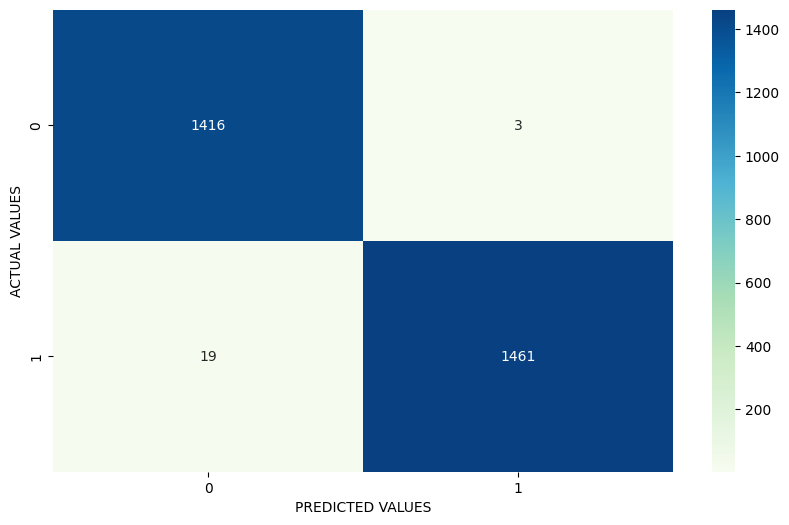

In [45]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier()
bagging_model.fit(x_train, y_train)
y_pred = bagging_model.predict(x_test)
print(classification_report(y_test,y_pred))

# Creating Heatmap of the Confussion Matrix by seaborn
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1464
           1       0.97      1.00      0.98      1435

    accuracy                           0.98      2899
   macro avg       0.98      0.98      0.98      2899
weighted avg       0.98      0.98      0.98      2899



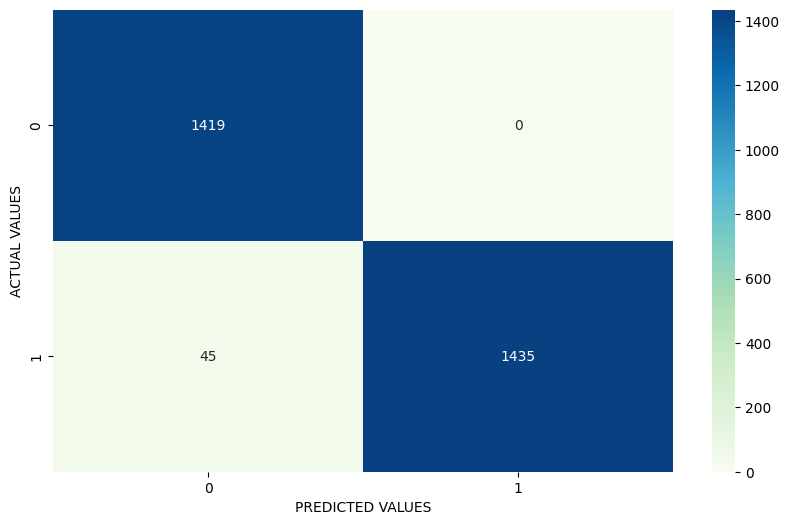

In [46]:
svm_model=SVC()
svm_model.fit(x_train, y_train)
svm_pred=svm_model.predict(x_test)
print(classification_report(svm_pred,y_test))

plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,svm_pred),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1546
           1       0.74      0.81      0.77      1353

    accuracy                           0.78      2899
   macro avg       0.78      0.78      0.78      2899
weighted avg       0.78      0.78      0.78      2899



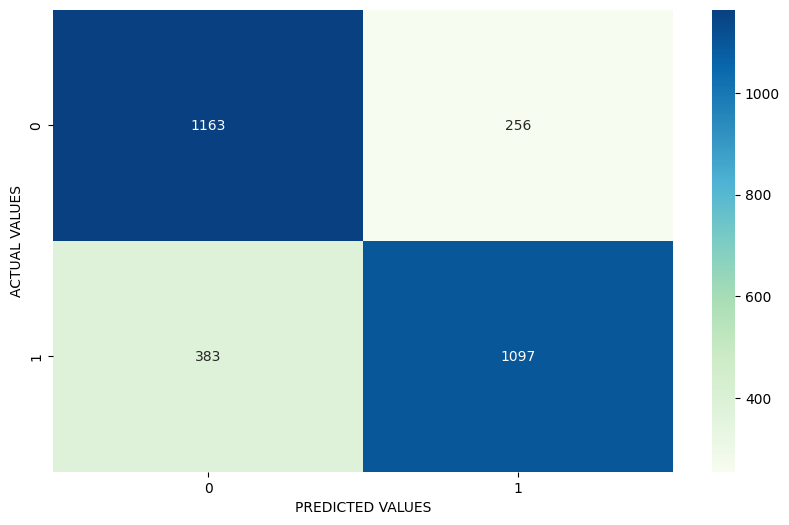

In [47]:
lr_model=LogisticRegression()
lr_model.fit(x_train, y_train)
lr_pred=lr_model.predict(x_test)
print(classification_report(lr_pred,y_test))

plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()